In [14]:
import pandas as pd
import numpy as np
import os
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [ ]:
# Mount Google drive folder
from google.colab import drive
drive.mount('/content/drive')

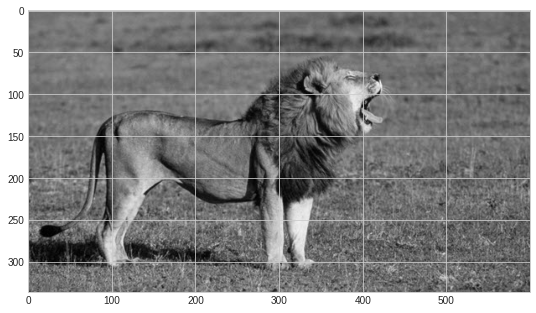

In [15]:
# Setup working directory and load data
DIR = '/content/drive/My Drive/Colab Notebooks/OddSem2020MAHE'
FILENAME = 'Data/lion.jpg'
os.chdir(DIR)
# Read image
img = Image.open(FILENAME)
# Convert to gray scale
imggray = img.convert('LA')
# Plot the image
plt.figure(figsize=(9, 6))
plt.imshow(imggray);

In [16]:
# Define matrices
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[7, 8], [9, 10], [11, 12]])
print(A)
print(B)

[[1 2 3]
 [4 5 6]]
[[ 7  8]
 [ 9 10]
 [11 12]]


In [17]:
print(A.shape)
print(B.shape)
print(np.dot(A, B))
print(A @ B)

(2, 3)
(3, 2)
[[ 58  64]
 [139 154]]
[[ 58  64]
 [139 154]]


In [28]:
# Matrix-matrix multiplication version-4 (A as such, B in terms of its columns)
np.dot(A[:, 0].reshape(-1,1), B[0, :].reshape(-1,1).T) + np.dot(A[:, 1].reshape(-1,1), B[1, :].reshape(-1,1).T)+np.dot(A[:, 2].reshape(-1,1), B[2, :].reshape(-1,1).T)

array([[ 58,  64],
       [139, 154]])

In [ ]:
# Convert image to numpy matrix
A = np.array(list(imggray.getdata(band=0)), float)
A.shape = (imggray.size[1], imggray.size[0])
A = np.matrix(A)
print(A.shape)
plt.figure(figsize=(9,6))
plt.imshow(A, cmap='gray');

Calculate the singular value decomposition (SVD) of the $337\times600$-matrix A:

$$\underbrace{A}_{337\times600} = \underbrace{U}_{337\times337}\times \underbrace{\Sigma}_{337\times600}\times \underbrace{V^\mathrm{T}}_{600\times600}.$$ 

In [42]:
U, sigma, VT = np.linalg.svd(A)

In [43]:
V = VT.T

In [44]:
print(A.shape)
print(U.shape)
print(sigma.shape)
print(V.shape)

(337, 600)
(337, 337)
(337,)
(600, 600)


In [ ]:
print(sigma)

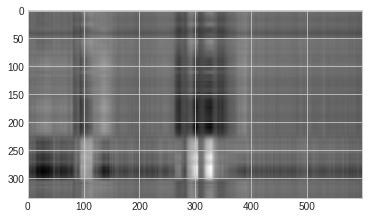

In [47]:
rank = 10
A_approx = sigma[0]*np.dot(U[:, 0].reshape(-1,1), V[:, 0].reshape(-1,1).T) 
plt.imshow(A_approx, cmap='gray');

In [48]:
def plotveccomp(x, name = ' ', color = 'black', marker = '*', axis = None):
  ax = axis
  component_index = range(0, len(x))
  ax.plot(component_index, x, color = color, marker = marker) 
  ax.plot(component_index, [np.mean(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='blue') 
  ax.plot(component_index, [np.mean(x) - np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red')
  ax.plot(component_index, [np.mean(x) + np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red')
  ax.set_xlabel('Index')
  ax.set_ylabel('Value')
  ax.set_title('Component plot of '+name)

AttributeError: ignored

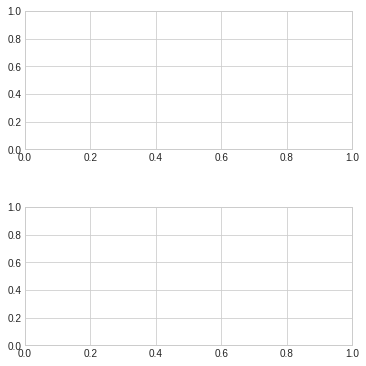

In [51]:
fig, ax = plt.subplots(2, 1, figsize = (6,6))
fig.tight_layout(pad = 4.0)
plotveccomp(U[:, 0], 'u_1', 'black', '', ax)
#plotveccomp(U[:, 99], 'u', 'blue', '', ax)
#plotveccomp(U[:, 199], 'u', 'blue', '', ax)
#plotveccomp(U[:, 299], 'u', 'blue', '', ax)